#Practica 4:
###Simular la demanda diaria de clientes en una tienda de telefono móviles.

##Contexto de la situación:

Imagina una tienda en línea que maneja inventarios de productos tecnológicos, como teléfonos móviles. La demanda diaria de estos productos es impredecible, afectada por promociones, tendencias y comportamiento del cliente. Los gestores de inventario enfrentan el reto de mantener un stock óptimo: demasiado inventario resulta en costos de almacenamiento altos, mientras que poco inventario resulta en pérdida de ventas y clientes. Para mejorar la gestión de inventarios, modelar la demanda diaria como una variable aleatoria es crucial. Esto permite realizar simulaciones para calcular el nivel de inventario que minimiza costos y maximiza ventas, asegurando satisfacer la demanda la mayoría de los días.

##Justificación de la distribución Poisson:

Para modelar la demanda diaria, la distribución Poisson es adecuada por varias razones:

Demanda discreta: La demanda diaria es un número entero de unidades.

Promedio constante: La demanda diaria puede variar, pero su promedio se mantiene constante.

Eventos independientes: La demanda de un día generalmente no depende de la de otro.

##Aplicación del método de la transformada inversa con la distribución Poisson:

Este método genera variables aleatorias que siguen una distribución Poisson, representando la demanda diaria de clientes:

Función de distribución acumulada (FDA): La FDA de Poisson se aproxima sumando las probabilidades acumuladas para diferentes valores de demanda.

Número aleatorio uniforme (U): Generar un número aleatorio uniforme entre 0 y 1.

Aplicar la transformada inversa: Encontrar el menor valor x tal que la FDA
𝐹
(
𝑥
)
≥
𝑈
, este valor será la demanda diaria simulada.

##Contexto de la simulación y justificación:

Simulación de demanda: Prever la cantidad de productos vendidos en un periodo determinado.

Optimización del inventario: Ejecutar múltiples simulaciones para calcular el nivel de stock óptimo que cubra la mayoría de los días sin excesos.

Datos históricos: Si los datos muestran que la demanda diaria oscila alrededor de un promedio constante (ej. 5 productos al día), la distribución Poisson es ideal.##

Modelado de eventos raros: La Poisson modela bien días de demanda excepcionalmente alta, como durante promociones.

<ipython-input-2-a740ab8dae5b>:14: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  F_k += (lambda_poisson**k * np.exp(-lambda_poisson)) / np.math.factorial(k)


Demanda diaria simulada: [5, 5, 7, 3, 9, 1, 10, 2, 7, 10, 9, 6, 6, 6, 4, 5, 3, 5, 6, 3, 2, 6, 5, 1, 4, 3, 1, 2, 5, 8, 5, 6, 5, 2, 5, 7, 4, 5, 10, 8, 3, 0, 5, 1, 5, 9, 9, 6, 8, 8, 3, 3, 5, 5, 2, 7, 7, 3, 6, 4, 4, 6, 8, 3, 3, 8, 6, 0, 6, 6, 3, 9, 4, 8, 7, 4, 2, 7, 5, 3, 5, 7, 8, 9, 4, 6, 3, 5, 5, 5, 6, 2, 6, 6, 3, 1, 8, 6, 6, 5]


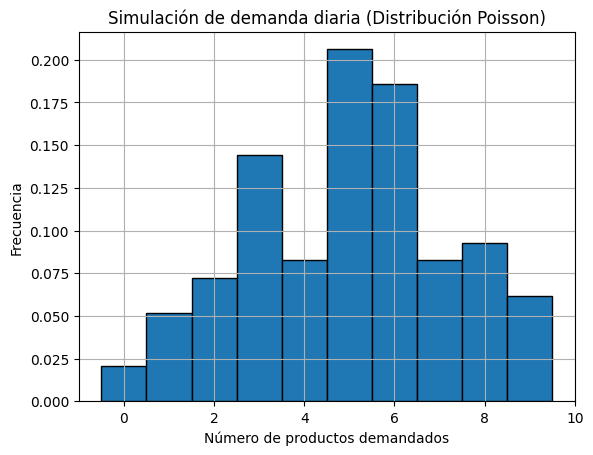

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lambda_poisson = 5

n = 100
U = np.random.uniform(0, 1, n)

def poisson_inverse_transform(lambda_poisson, U):
    k = 0
    F_k = np.exp(-lambda_poisson)
    while U > F_k:
        k += 1
        F_k += (lambda_poisson**k * np.exp(-lambda_poisson)) / np.math.factorial(k)
    return k

demanda_simulada = [poisson_inverse_transform(lambda_poisson, u) for u in U]

print("Demanda diaria simulada:", demanda_simulada)

plt.hist(demanda_simulada, bins=np.arange(0, max(demanda_simulada) + 1) - 0.5, edgecolor='black', density=True)
plt.title("Simulación de demanda diaria (Distribución Poisson)")
plt.xlabel("Número de productos demandados")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


#Conclusión

El método de la transformada inversa utilizando la distribución de Poisson es eficaz para generar variables aleatorias que representan la demanda de los clientes. Este enfoque es útil para gestionar los niveles de inventario en un sistema donde la demanda diaria fluctúa aleatoriamente, lo que ayuda a reducir los costos de almacenamiento y las pérdidas por falta de stock.